# Generation of random variables - Exercises

Name: Carlos Cocha

In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from scipy.interpolate import CubicSpline

### 1. Calculate pi following the strategy on slides.

In [111]:
def montecarlo_pi(N, R = 1):
    '''
    Function to calculate pi using N random numbers
    and a certain radius R.
    
    Arguments:
    N: number of random variables
    R: radius (1 by default)

    - Example:
    montecarlo_pi(1000)
    3.208
    '''
    x = R*np.random.random_sample([N])
    y = R*np.random.random_sample([N])
    d_2 = x*x + y*y
    hits = 0
    for i in range(N):
        if d_2[i] <= R*R:
            hits += 1
    pi = 4*(hits/N)
    return pi

In [132]:
def arr_pi(N_array):
    '''
    Function to calculate the error and the relative error 
    of pi using a N array.   
    
    Arguments:
    N_array: List with different  N variables.

    Example:
    arr_pi([100, 1000,5000, 10000, 25000, 50000])
    - [33.84, 2.96, 1.6, 1.24, 0.7, 0.54]    (error)
    - [10.77, 0.94, 0.51, 0.39, 0.22, 0.17]  (relative error)
    '''
    
    pi=[] # to store different values of pi
    error_pi = []  # to store the errors of pi
    rel_unc_pi = [] # to store the relative uncertaninty of pi
    
    for i in range(len(N_array)):
        pi_mont = montecarlo_pi(N_array[i]) #my pi
        pi.append(pi_mont)
        error_pi.append(round(100*np.abs(np.pi -pi_mont),2))
        rel_unc_pi.append(round(100*np.abs(np.pi -pi_mont)/np.pi,2))

    return error_pi, rel_unc_pi

In [136]:
N_array = [100, 1000,5000, 10000, 25000, 50000]
error_pi, rel_unc_pi = arr_pi(N_array)   

a. Plot the error of “your ” value as a function of the number of points N generated. (Use
N=100, 1000, 5000, 10000. . . )

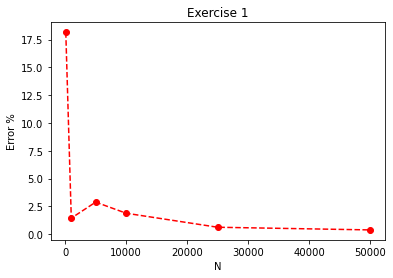

In [151]:
plt.figure(figsize = (6,4))
plt.plot(N_array, error_pi, "or--")
plt.title("Exercise 1")
plt.ylabel("Error %")
plt.xlabel("N")
plt.show()

b. Plot the relative error of “your pi” as a function of 1/sqrt(N) .

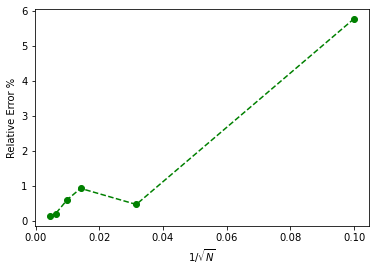

In [150]:
plt.figure(figsize=(6,4))
plt.plot(1/np.sqrt(N_array),rel_unc_pi, "og--")
plt.ylabel('Relative Error %')
plt.xlabel('$1/\sqrt{N}$')
plt.show()

### 2. Produce a 2D uniform distribution of points within a circumference of radius R = 3.0.
Use both the inverse transform method and the acceptance-rejection method.


In [152]:
def circle_inv_trans(R, N):
    '''
    Function that generates x,y data of a circumference 
    using inverse transformation method.
    
    Arguments:
    R: radius of the circumference.
    N: size of the data or number of shoots.
    '''
    gamma = np.random.random_sample([N])
    r = R*np.sqrt(gamma)
    
    gamma1 = np.random.random_sample([N])
    theta =  2*np.pi*gamma1
    
    x,y = [],[]
    for i in range(N):
        x.append(r[i]*math.cos(theta[i]))
        y.append(r[i]*math.sin(theta[i]))
    return x, y

In [153]:
def cicle_acc_rejec(R, N):
    '''
    Function that generates x,y data of a circumference 
    using acceptance-rejection method.
    
    Arguments:
    R: radius of the circumference.
    N: size of the data or number of shoots.
    '''
    x = R*(2*np.random.random_sample([N])-1)
    y = R*(2*np.random.random_sample([N])-1)
    d_2 = x*x + y*y
    x1, y1 = [] , []
    for i in range(N):
        if d_2[i] <= R*R:
            x1.append(x[i])
            y1.append(y[i])
    return x1, y1

a. Shoot 1e+6 points. Plot a 2D histogram with the positions obtained (use bins of size 0.1 × 0.1).

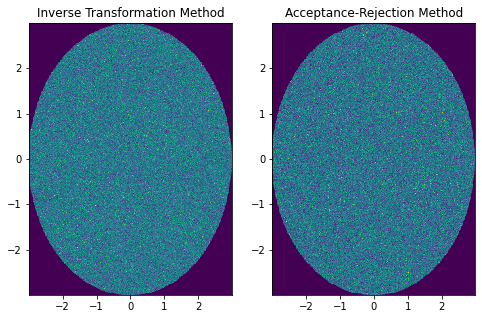

In [156]:
def histogram_circle(R, N):
    '''
    Function that plots a 2D histogram of a circumference 
    using inverse trasformation and acceptance-rejection method.
    
    Arguments:
    R: radius of the circumference.
    N: size of the data or number of shoots.
    '''
    
    x1, y1 = circle_inv_trans(R, N)
    x2, y2 = cicle_acc_rejec(R, N)

    fig = plt.figure(figsize = (8,5))
    gs = GridSpec(1,2) # 2 rows, 1 columns
    ax1 = fig.add_subplot(gs[0,0])
    ax1.hist2d(x1, y1, bins = [int(R/0.01), int(R/0.01)])
    ax1.set_title("Inverse Transformation Method")
    
    ax2 = fig.add_subplot(gs[0,1])
    ax2.hist2d(x2, y2, bins = [int(R/0.01), int(R/0.01)])
    ax2.set_title("Acceptance-Rejection Method")
    
    plt.show()

histogram_circle(3,1000000)

### 3. Produce a code to simulate a particle source with the following features: point-like source centered at the origin of coordinates and initial directions uniformly distributed within a cone with angle aperture of 30 deg and oriented towards z < 0 (i.e., 150 deg ≤ θ ≤ 180 deg). Shoot 10 000 particles and plot a histogram illustrating the frequency distribution of [cos(θ)] and [φ].

In [82]:
def simulation(N):
    ''' 
    Function which simulates a particle source within a cone
    with angle aperture of 30 deg and oriented towards 
    z < 0 (150 deg ≤ θ ≤ 180 deg) to plot a histogram illustrating
    the frequency distribution of [cos(θ)] and [φ].
    
    Arguments:
    N: number of particles shots.
    '''

    phi = 2*np.pi*np.random.random_sample([N])
    # θ=acos(2gamma-1)
    #if θ=150-> gamma=1/4*(2-np.sqrt(3))  and if θ=180 -> gamma=0
    gamma = 1/4*(2-np.sqrt(3))*np.random.random_sample([N]) 
    
    cos_theta = []
    for i in range(N):
        cos_theta.append(math.cos(math.acos(2*gamma[i]-1)))

    fig = plt.figure(figsize=(9,8))
    gs = GridSpec(2,1) # 2 rows, 1 columns
    
    labels = ("0","$\pi$/4", "$\pi$/2", "$3\pi$/4", "$\pi$",
              "$5\pi$/4","3$\pi$/2","$7\pi/4$", "$2\pi$")
    phi_pi = [val for val in np.arange(0, 2*np.pi+0.1, np.pi/4)]
    
    ax1 = fig.add_subplot(gs[0,0])
    plt.xticks(phi_pi, labels)
    ax1.hist(phi, bins = 20)
    ax1.set_ylabel('Frequency')
    ax1.set_xlabel('$\phi$')
    
    ax2 = fig.add_subplot(gs[1,0])
    ax2.hist(cos_theta, bins = 20)
    ax2.set_ylabel('Frequency')
    ax2.set_xlabel('cos($\\theta$)')
    
    plt.show()    

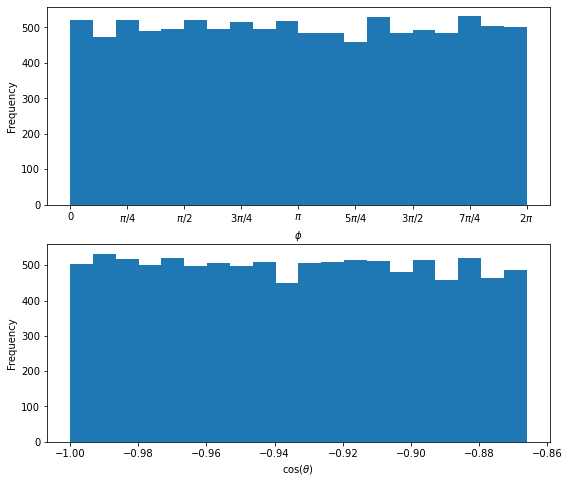

In [83]:
simulation(10000)

### 4. You are given a scintillator material which output photons which wavelengths λ (between 400 and 700 nm) follow a distribution which can be modelled according to the following histogram:

a. Plot, as function of λ, the original distribution yield and the distribution yield you have obtained with Monte Carlo methods after producing 100 000 random values. 

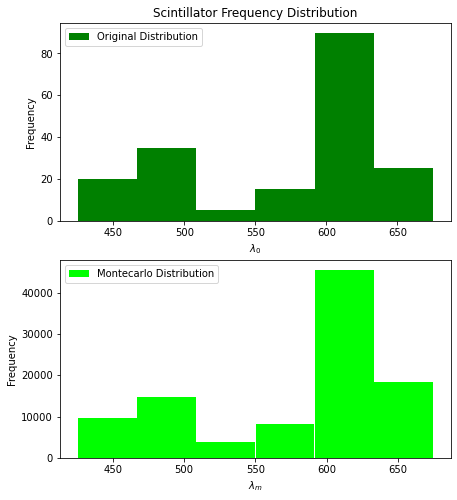

In [95]:
def cum_rel_freq(freq_array):
    '''
    Function that given a frequency array calculates the 
    cumulative relative frequency. 
    
    Arguments:
    freq_array: frequency array.
    
    Example:
    cum_rel_freq([0,20,35,5,15,90, 25])
    - [0.0, 0.10526,  0.28943, 0.3157, 0.3947,  0.8684, 1.0]
    
    '''
    cum_rel_freq_array= [freq_array[0]]
    for i in range(len(freq_array)-1):
        cum_rel_freq_array.append(cum_rel_freq_array[i]+freq_array[i+1])
    return list(map(lambda x:x /cum_rel_freq_array[-1], cum_rel_freq_array))

    
def scintillator(N, yields_0):
    ''' 
    Function that plot a original distribution yield and the distribution 
    yield obtained by means of a Monte Carlo method producing N random values.
    
    Arguments:
    N: number of random numbers to be generated.
    yields_0: distribution frequency array. 
    '''    
    lambda_s = [425, 475, 525, 575, 625, 675]
    yields = [0] + yields_0
    cum_rel_yields = cum_rel_freq(yields)
    
    for i in range(N):
        alpha = np.random.random_sample() #random number 
        for j in range(len(cum_rel_yields)-1): 
            #check where is located the random number in the cumulative freq. 
            if alpha > cum_rel_yields[j] and alpha <= cum_rel_yields[j+1]:
                yields[j+1] += 1
        cum_rel_yields = cum_rel_freq(yields)

    rel_freq = [cum_rel_yields[i+1] - cum_rel_yields[i] 
                for i in np.arange(len(cum_rel_yields) - 1)]
    
    #create the data for the histograms
    lambda_0 = [] #original distribution
    lambda_m = [] #montecarlo distribution
    for i in range(len(lambda_s)):
        lambda_0 += [lambda_s[i]]*yields_0[i]
        lambda_m += [lambda_s[i]]*(int(rel_freq[i]*sum(yields)))
    
    fig = plt.figure(figsize=(7,8))
    gs = GridSpec(2,1) # 2 rows, 1 columns
    ax1 = fig.add_subplot(gs[0,0])
    ax1.hist(lambda_0, bins = 6, color = 'green',
             label = 'Original Distribution')
    ax1.set_title('Scintillator Frequency Distribution')
    ax1.set_ylabel('Frequency')
    ax1.set_xlabel('$\lambda_0$')
    ax1.legend()
    
    ax2 = fig.add_subplot(gs[1,0])
    ax2.hist(lambda_m, bins = 6,color = 'lime', rwidth = 0.99,
             label = 'Montecarlo Distribution')
    ax2.set_ylabel('Frequency')
    ax2.set_xlabel('$\lambda_m$')
    ax2.legend()
    
    plt.show()

scintillator(100000, [20,35,5,15,90, 25])

### 5. Interpolate the distribution given above using either linear interpolation or (preferable) a cubic spline.
a. Use the interpolated result to sample 60 values uniformly distributed between
400 nm and 700 nm. Produce a new table, similar to that shown on the previous
exercise

In [102]:
def distri_interpolate(N):
    '''
    Function which interpolates a distribution using cubic spline,
    and samples N values uniformly distributed between 400 nm and
    700 nm to produce a new frequency distribution array.
    
    Arguments:
    N: number of uniformly distributed values.
    
    Example
    distri_interpolate(60)
    Output:
    [176, 327, 74, 209, 809, 255] #new frequency array
    
    '''
    lambda_s = [400, 425, 475, 525, 575, 625, 675, 700]
    yields= [0, 20,35,5,15,90, 25,0]
    cs = CubicSpline(lambda_s, yields)
    xs = np.arange(400, 700, 0.1)
    
    lambda_mo = np.linspace(400, 700, num=60, endpoint=True)
    new_table = cs(lambda_mo)
    
    lambda_m = []
    for i in range(len(new_table)):
        lambda_m += [lambda_mo[i]]*round(new_table[i])    
    
    fig=plt.figure(figsize=(6.5, 8))
    gs=GridSpec(2,1) 
    ax1=fig.add_subplot(gs[0,0])
    ax1.plot(lambda_s, yields, 'o', label='data')
    ax1.plot(xs, cs(xs), '--', label="Interpolation")
    ax1.plot(lambda_m, cs(lambda_m),'o', label="Distributed values")
    
    ax1.set_title('Scintillator Frenquency distribution')
    ax1.set_ylabel('Frequency')
    ax1.set_ylim(0, )
    ax1.set_xlabel('$\lambda_e$')
    ax1.legend(loc='upper left', ncol=2)
    plt.show()
    
    ax2=fig.add_subplot(gs[1,0])
    n, bins, patches = ax2.hist(lambda_m, bins=6, range =[400,700])    

    print ('{3}{0:2s} {1:3s}{3} {2:4s}'.format("nm", ' nm ','yield' ,''))
    for i in range(len(n)):
        print ('{3}{0:2d} {1:3d}{3} {2:4d}'.
               format(int(bins[i]), int(bins[i+1]), int(n[i]) ,''))
    
    return [int(x) for x in n]

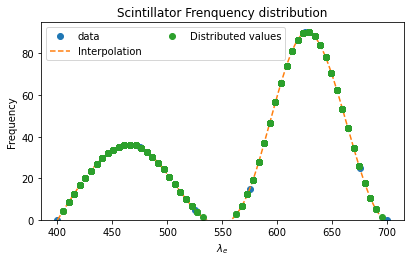

nm  nm  yield
400 450  176
450 500  327
500 550   74
550 600  209
600 650  809
650 700  255


In [106]:
new_yield = interpolate(60)

b. Repeat exercise 4 with the newly created table.

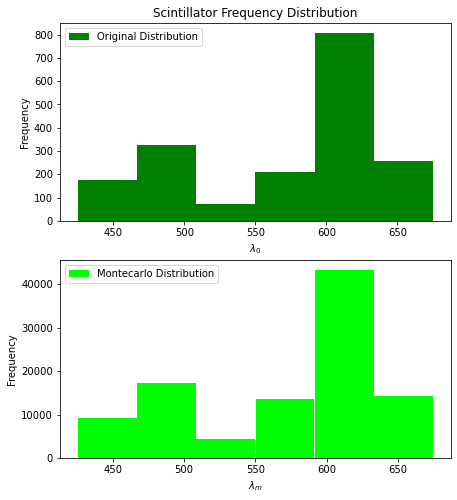

In [104]:
scintillator(100000, new_yield)

# EXTRA

In [ ]:
def neutron_montecarlo(E_a, E_t, N, h, k_t):

    '''Function to compute the neutron probability of
    transmision, reflexion,  and absorption into a slab,
    using the inverse transform method

    Arguments:

    E_a :: The absorption cross section of the slab (cm^-1)
    E_t  :: The scattering cross section of the slab (cm^-1)
    N :: Number of neutrons
    h  :: Thickness of the slab (cm)
    k_t :: Maximum number of collisions inside the slab


    Example:

    input
    neutron_montecarlo(0.014, 0.097, 10000, 50, 20)

    output
    0.0136   0.7355    0.2509
    P_trans  P_reflex  P_absorp

    Input data for Al taken of:
    P. Rinard: Neutron interactions with matter; Table: 12-3.
    http://www.gammaexplorer.com/lanlreports/lanl1_a/lib-www/la-pubs/00326407.pdf
    '''

    N_t = 0 #transmitted neutrons
    N_r = 0 # reflected neutrons
    N_0 = 0 # captured electron

    for i in range(N):
        k = 0 # colision number
        z_k =0 # neutron position in the slab

        while k <= k_t:
            k += 1
            lambda_k = -1/(E_t + E_a)*math.log(np.random.random_sample())
            theta_k = math.acos(1- 2*np.random.random_sample())

            z_k += lambda_k*np.cos(theta_k) # new neutron position

            if z_k > h: #condition for transmited neutron
                N_t += 1
                break

            elif z_k < 0: #condition for reflected neutron
                N_r += 1
                break

            elif z_k >= 0 and z_k <= h: #condition for captured neutron
                if  E_a/(E_a + E_t) > np.random.random_sample():
                    N_0 += 1
                    break
                elif k > k_t: # repeat the process
                    k -= 1
    # Probabilities
    P_t = N_t/N
    P_r = N_r /N
    P_0 = N_0/N

    return P_t, P_r, P_0

a,b,c = neutron_montecarlo(533, 532, 100000, 50, 20)
#Data for  Boron slab and thermal neutrons, same reference
print('The probability of neutron transmision is:', a)
print('The probability of neutron reflexion is:', b)
print('The probability of neutron absorption is:', c)

# Result make sense because thermal neutrons can be easily shielded
# by Boron or Cadmium as they have large neutron cross sections (P_t=0)